# Calculating portfolio returns

In order to build and backtest a portfolio, you need to have the returns of multiple assets in a single object

Our model portfolio consists of the following companies and the weight in our portfolio represented by percentages:

* Bitcoin 20%
* Apple 12%
* Microsoft 15%
* Exxon Mobil 8%
* JP Morgan 9%
* Amazon 10%
* Facebook 5%
* AT&T 16%
* Tesla 5%

Note: The portfolio weights should sum up to 100% in most cases

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
Date         365 non-null int64
Open         365 non-null float64
High         365 non-null float64
Low          365 non-null float64
Close        365 non-null float64
Adj Close    365 non-null float64
Volume       365 non-null int64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


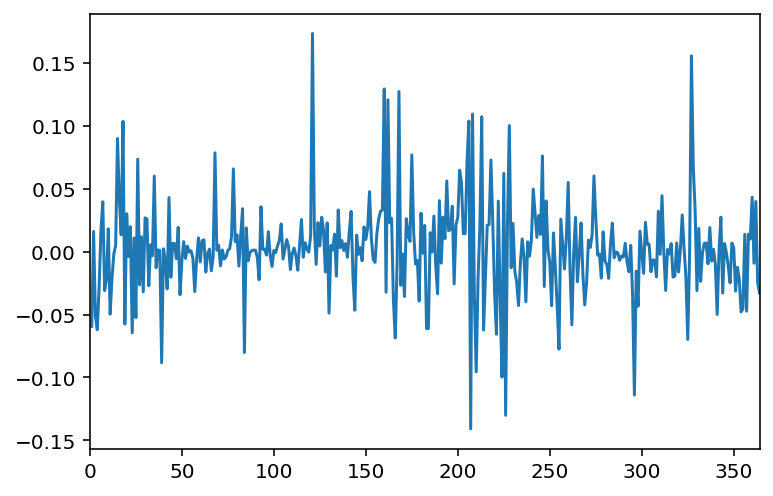

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
%config InlineBackend.figure_format='retina'

btc = pd.read_csv('BTC-USD.csv', parse_dates=['Date'])
btc = btc.sort_values(by='Date')
btc.set_index('Date', inplace=False)
btc['Date'] = pd.to_datetime(btc['Date']).astype(np.int64)

btc.info()

btc['Returns'] = btc['Adj Close'].pct_change()
btc['Returns'].plot()
plt.show();

In [2]:
# Define the portfolio weights as a numpy array
#portfolio_weights = np.array([0.20, 0.12, 0.15, 0.08, 0.09, 0.10, 0.05, 0.16, 0.05])

# Calculate the weighted stock returns
#WeightedReturns = btc[:9]['Returns]'.mul(portfolio_weights)
# Calculate the portfolio returns
#btc['Portfolio'] = WeightedReturns.sum()

# Plot cumulative portfolio returns over time
#CumulativeReturns = ((1 + btc['Portfolio']).cumprod()-1)
#CumulativeReturns.plot()
#plt.show();

# THIS CAN'T BE RIGHT

# Calculate the daily returns of the adjusted close price

                  Date         Open         High          Low        Close  \
0  1543708800000000000  4200.733398  4301.519531  4110.978516  4139.877930   
1  1543795200000000000  4147.323730  4155.979492  3840.446289  3894.130859   
2  1543881600000000000  3886.294922  4075.627686  3832.750000  3956.893799   
3  1543968000000000000  3958.894775  3969.535889  3753.994873  3753.994873   
4  1544054400000000000  3754.074463  3874.966064  3521.101807  3521.101807   

     Adj Close      Volume   Returns  
0  4139.877930  5262697895       NaN  
1  3894.130859  5089570993 -0.059361  
2  3956.893799  5028069239  0.016117  
3  3753.994873  5302481573 -0.051277  
4  3521.101807  5878333109 -0.062039  


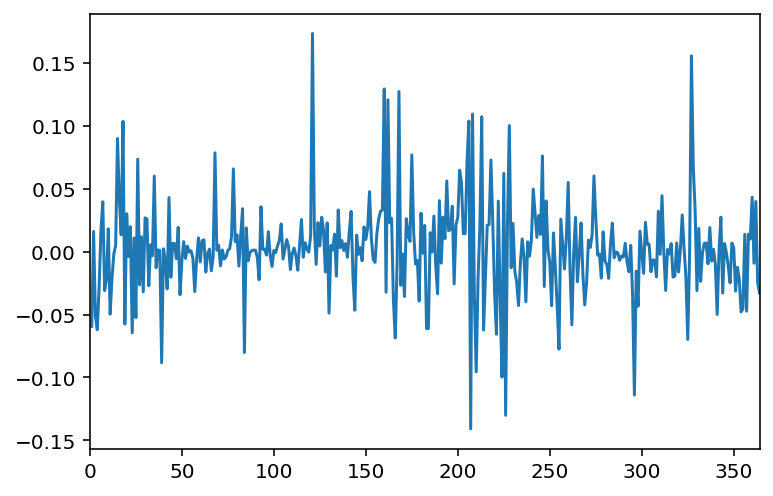

In [3]:
btc['Returns'] = btc['Adj Close'].pct_change()

# Check first five rows
print(btc.head())

# Plot the returns column over time
btc['Returns'].plot()
plt.show();

# Return Distributions

In order to analyze the probability of outliers in returns, visualize the historical returns using a histogram

You can use the histogram to show the historical density or frequency of a given range of returns

Note: The outliers on the left tail of the return distribution are what you want to avoid, as they represent large negative daily returns. Outliers on the right hand side of the distribution are normally good events for the security

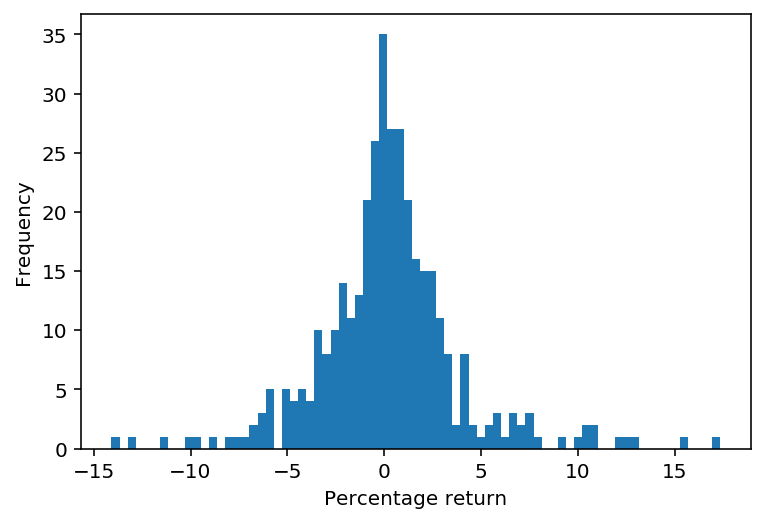

In [4]:
# Convert decimal returns into percentage returns
percent_return = btc['Returns']*100

# Drop missing values
returns_plot = percent_return.dropna()

# Plot the returns
plt.hist(returns_plot, bins=75)
plt.xlabel('Percentage return')
plt.ylabel('Frequency')
plt.show();

## Equal weighted portfolios
When comparing portfolios you want to consider performance versus a naive equally-weighted portfolio.
If the portfolio doesn't outperform a simple equally weighted portfolio you might want to consider another strategy, or opt for the naive approach if all else fails.
You can expect equally-weighted portfolios to tend to outperform the market when the largest companies are doing poorly.

In [5]:
# Number of stocks in your portfolio
numstocks = 8

# Creat array of equal weights across all assests
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate equally weighted portfolio returns
btc['Portfolio_EW'] = btc.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
print(btc['Portfolio_EW'])

0      1.929636e+17
1      1.929744e+17
2      1.929852e+17
3      1.929960e+17
4      1.930068e+17
           ...     
360    1.968516e+17
361    1.968624e+17
362    1.968732e+17
363    1.968840e+17
364    1.969056e+17
Name: Portfolio_EW, Length: 365, dtype: float64


## Market-cap weighted portfolios
When large companies are doing well, market cap weighted portfolios outperform due to the largest weights being assigned to the largest companies.

Note: The BTC data does NOT include market cap so i'll be using arb numbers

In [6]:
# Create an array of market cap in billions
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57])

# Calculate the market cap weights
mcap_weights = market_capitalizations / sum(market_capitalizations)

# Calculate market cap weighted portfolio returns
btc['Portfolio_Mcap'] = btc.iloc[:, 0:8].mul(mcap_weights, axis=1).sum(axis=1)
print(btc['Portfolio_Mcap'])

0      3.107722e+17
1      3.107896e+17
2      3.108070e+17
3      3.108244e+17
4      3.108418e+17
           ...     
360    3.170339e+17
361    3.170513e+17
362    3.170687e+17
363    3.170861e+17
364    3.171209e+17
Name: Portfolio_Mcap, Length: 365, dtype: float64


## NOTE: The 2 above methods are right in the sense of how to determine them, but the result is NOT correct

## The correlation matrix
The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets.
Correlation ranges from -1 to 1. The diagonal of the correlation matrix is always 1. The matrix is symmetric.

In [7]:
# Calculate the correlation matrix
correlation_matrix = btc.corr()

# Print the matrix
# print(correlation_matrix)

### NOTE: The output is NOT correct. Our BTC dataframe ONLY contains bitcoin information, no other stocks or security information to see a correlation

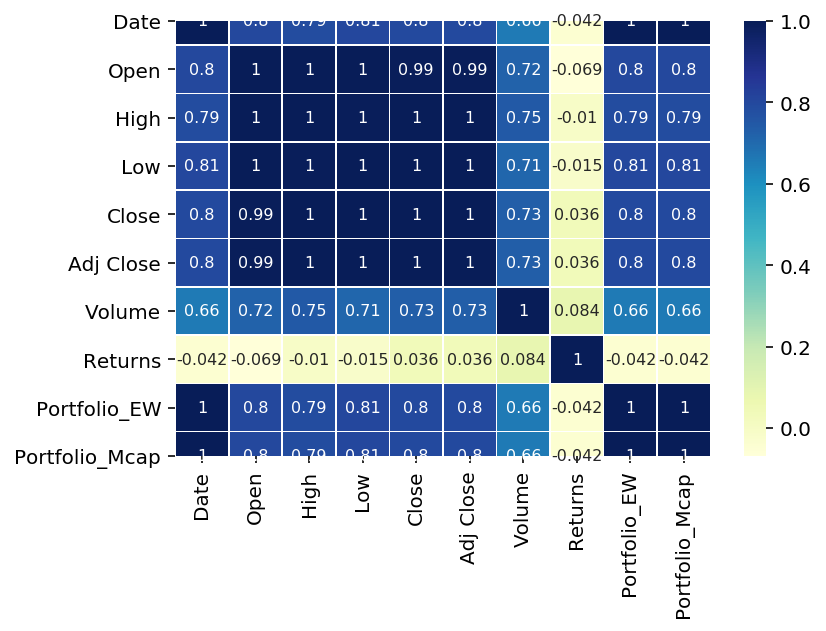

In [8]:
import seaborn as sns

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='YlGnBu',
            linewidths=0.3,
            annot_kws={'size': 8})

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show();

# NOTE: This is the correct method to create a heatmap but our data is only BTC

## The co-variance matrix
The correlation matrix doesn't really tell you anything about the variance of the underlying assets, only the linear relationships between assets.
The co-variance matrix on the other hand contains all of this information, which is useful for portfolio optimization and risk management purposes

In [9]:
# Calculate the covariance matrix
cov_mat = btc.cov()

# Annualize the co-variance matrix(number of trading days)
cov_mat_annual = cov_mat * 365

# Print annualized covariance matrix
#print(cov_mat_annual)


# Since the variance is the square of vol you didnt have to multiply by the square root of 365